### 1. Setup 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

### 2. Load Data

In [2]:
BostonData = load_boston()
print(BostonData.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
X_Boston,y_Boston = load_boston(return_X_y=True)

In [4]:
X_Boston = pd.DataFrame(X_Boston,columns=BostonData.feature_names)
y_Boston = pd.Series(y_Boston,name='MEDV')

In [5]:
X_Boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [6]:
y_Boston.head(10)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: MEDV, dtype: float64

### 3. Cleaning, Preprocessing

#### a. Drop duplicates, NA

In [7]:
X_Boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [8]:
y_Boston.isna().sum()

0

In [9]:
shape_X = X_Boston.shape
print(shape_X)
X_Boston2 = X_Boston.drop_duplicates()
print(X_Boston2.shape)

(506, 13)
(506, 13)


In [10]:
del X_Boston2

In [11]:
X_Boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [12]:
y_Boston.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

### 4. Feature Engineering

#### a. Hist plots of each feature & corr plot

In [13]:
BostonData = pd.concat([X_Boston,y_Boston],axis=1)

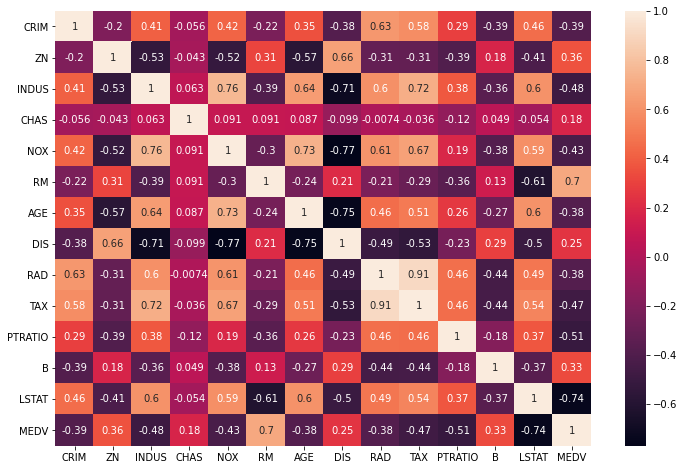

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(BostonData.corr(),annot=True)

* Observation: 
    1. LSTAT,RM have very high correlation with the output variable, followed by PTRATIO, INDUS, TAX, NOX parameters. 

#### b. Viewing distributions of all features

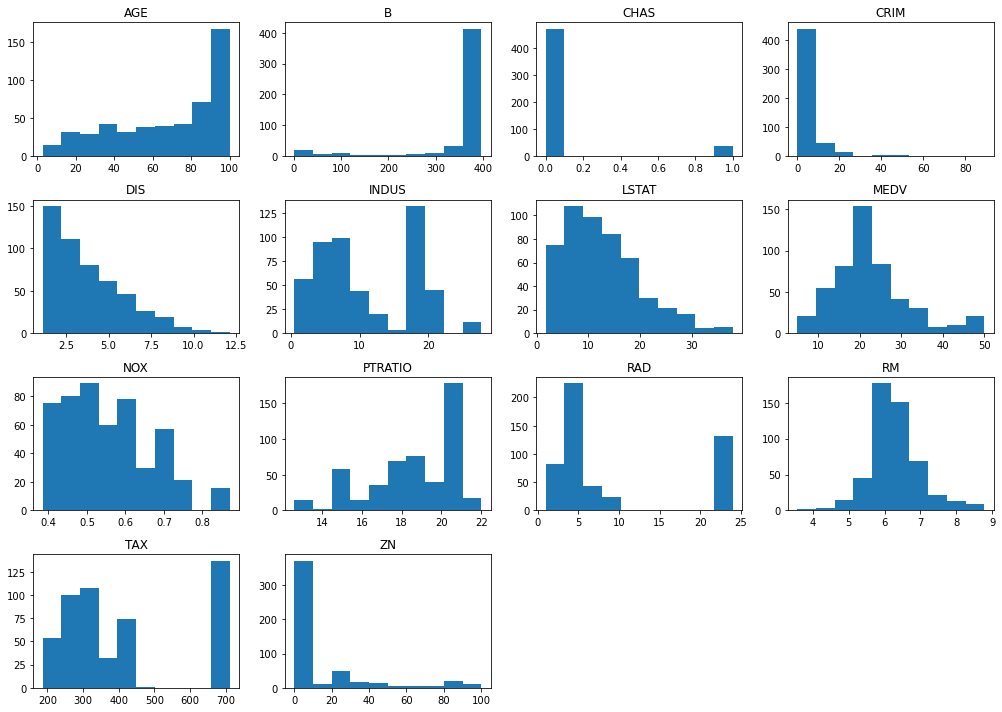

In [15]:
BostonData.hist(grid=False,figsize=(14,10))
plt.tight_layout()

#### Summary: 
* At this point, it is definitely required to remove the binary category variable CHAS. 
* As for the rest of the features, we let them be and see how they emerge in the models. 


In [16]:
X_features = X_Boston.drop('CHAS',axis=1)

In [17]:
X_features.shape

(506, 12)

### 5. Models

Trying a couple of models (with the default settings)
    1. Linear Regression
    2. Ridge Regression 
    3. Lasso Regression 
    4. Random Forest Regression 
    5. Gradient Boost Regression 
    6. XG Boost Regression 

Steps: 
    1. Split data in train and test
    2. Do 5 fold cross validation in the training data and get scores for various metrics. 
    3. Compare scores of various methods and evaluate. 

In [18]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X_Boston,y_Boston,test_size = 0.2,random_state = 0)

In [20]:
trainscores_R2 = []
trainscores_MAE = []
trainscores_MSE = []
trainscores_R2adj = []

testscores_R2 = []
testscores_MAE = []
testscores_MSE = []
testscores_R2adj = []

scaler = MinMaxScaler()

Models = [LinearRegression(),Ridge(),Lasso(),RandomForestRegressor(),GradientBoostingRegressor(),XGBRegressor()]

for model in Models:
    modelitn = model
    modelwithpipeline = make_pipeline(scaler,modelitn)
    modelwithpipeline.fit(X_train,y_train)
    r2_train = cross_val_score(modelwithpipeline,X_train,y_train,cv=5,scoring='r2')
    trainscores_R2.append(r2_train)
    trainscores_MAE.append(cross_val_score(modelwithpipeline,X_train,y_train,cv=5,scoring='neg_mean_absolute_error'))
    trainscores_MSE.append(cross_val_score(modelwithpipeline,X_train,y_train,cv=5,scoring='neg_mean_squared_error'))
    
    adjusted_r2_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    trainscores_R2adj.append(adjusted_r2_train)
    
    r2_test = r2_score(y_test,modelwithpipeline.predict(X_test))
    testscores_R2.append(r2_test)
    testscores_MAE.append(mean_absolute_error(y_test,modelwithpipeline.predict(X_test)))
    testscores_MSE.append(mean_squared_error(y_test,modelwithpipeline.predict(X_test)))

    adjusted_r2_test = 1 - (1 - r2_test)*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)
    testscores_R2adj.append(adjusted_r2_test)
    

([<matplotlib.axis.XTick at 0x7f2b7f79ebe0>,
 [Text(0, 0, '0'),
  Text(0, 0, 'Linear'),
  Text(0, 0, 'Ridge'),
  Text(0, 0, 'Lasso'),
  Text(0, 0, 'RF'),
  Text(0, 0, 'GB'),
  Text(0, 0, 'XGBoost')])

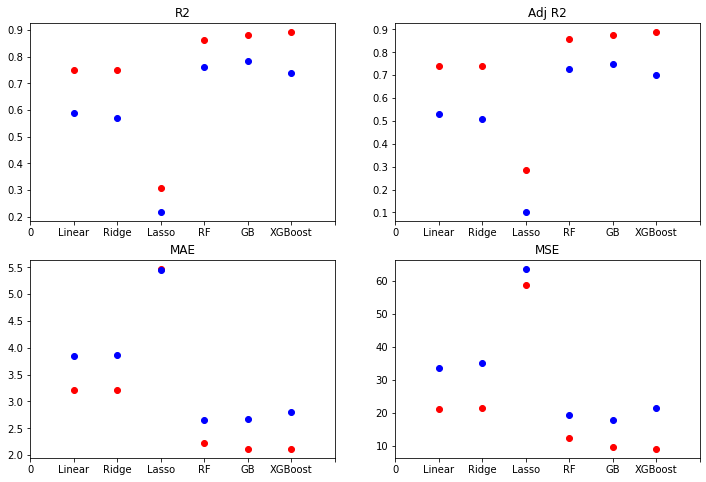

In [43]:
names = [0, 'Linear','Ridge','Lasso','RF','GB','XGBoost']

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.title('R2')
plt.plot(np.mean(trainscores_R2,axis=1),'ro')
plt.plot(testscores_R2,'bo')
locs, labels=plt.xticks()
plt.xticks(locs,names)

plt.subplot(2,2,2)
plt.title('Adj R2')
plt.plot(np.mean(trainscores_R2adj,axis=1),'ro')
plt.plot(testscores_R2adj,'bo')
locs, labels=plt.xticks()
plt.xticks(locs,names)

plt.subplot(2,2,3)
plt.title('MAE')
plt.plot(-np.mean(trainscores_MAE,axis=1),'ro')
plt.plot(testscores_MAE,'bo')
locs, labels=plt.xticks()
plt.xticks(locs,names)

plt.subplot(2,2,4)
plt.title('MSE')
plt.plot(-np.mean(trainscores_MSE,axis=1),'ro')
plt.plot(testscores_MSE,'bo')
locs, labels=plt.xticks()
plt.xticks(locs,names)



# https://stackoverflow.com/questions/56746148/how-to-change-xticks-with-matplotlib/56746205 Ref for x ticks 

### Some tuning to reduce overfitting: 
* We tune XGBoost to reduce overfitting in the model
* XGBoost params: 


1. Early stopping : https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/
https://stackoverflow.com/questions/50824326/xgboost-with-gridsearchcv-scaling-pca-and-early-stopping-in-sklearn-pipeline

In [63]:
scaler2 = MinMaxScaler()
X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

In [64]:
XGBoostModel.fit(X_train_scaled,y_train,eval_set= [(X_train_scaled, y_train), (X_test_scaled, y_test)],early_stopping_rounds=10,verbose=True)

[0]	validation_0-rmse:17.15623	validation_1-rmse:17.03628
[1]	validation_0-rmse:12.36946	validation_1-rmse:12.65919
[2]	validation_0-rmse:9.01987	validation_1-rmse:9.68325
[3]	validation_0-rmse:6.66054	validation_1-rmse:7.58305
[4]	validation_0-rmse:4.94963	validation_1-rmse:6.49571
[5]	validation_0-rmse:3.76091	validation_1-rmse:5.79471
[6]	validation_0-rmse:2.91603	validation_1-rmse:5.35296
[7]	validation_0-rmse:2.30274	validation_1-rmse:5.12211
[8]	validation_0-rmse:1.88148	validation_1-rmse:5.02319
[9]	validation_0-rmse:1.58293	validation_1-rmse:4.88767
[10]	validation_0-rmse:1.38020	validation_1-rmse:4.84380
[11]	validation_0-rmse:1.23143	validation_1-rmse:4.79844
[12]	validation_0-rmse:1.13758	validation_1-rmse:4.77369
[13]	validation_0-rmse:1.06650	validation_1-rmse:4.77988
[14]	validation_0-rmse:0.99108	validation_1-rmse:4.80349
[15]	validation_0-rmse:0.93963	validation_1-rmse:4.77130
[16]	validation_0-rmse:0.86965	validation_1-rmse:4.73090
[17]	validation_0-rmse:0.78041	valida

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
XGBoostModel.fit(X_train_scaled,y_train,eval_set= [(X_train_scaled, y_train), (X_test_scaled, y_test)],early_stopping_rounds=10,verbose=True,eval_metric='mae')

[0]	validation_0-mae:15.62086	validation_1-mae:15.36253
[1]	validation_0-mae:11.05669	validation_1-mae:11.00934
[2]	validation_0-mae:7.83575	validation_1-mae:7.92261
[3]	validation_0-mae:5.59376	validation_1-mae:5.81664
[4]	validation_0-mae:4.02341	validation_1-mae:4.57432
[5]	validation_0-mae:2.93190	validation_1-mae:3.72137
[6]	validation_0-mae:2.18457	validation_1-mae:3.21258
[7]	validation_0-mae:1.67927	validation_1-mae:2.98528
[8]	validation_0-mae:1.35669	validation_1-mae:2.91637
[9]	validation_0-mae:1.14251	validation_1-mae:2.83951
[10]	validation_0-mae:0.99177	validation_1-mae:2.83344
[11]	validation_0-mae:0.89326	validation_1-mae:2.82468
[12]	validation_0-mae:0.83235	validation_1-mae:2.82760
[13]	validation_0-mae:0.78509	validation_1-mae:2.83477
[14]	validation_0-mae:0.72913	validation_1-mae:2.82301
[15]	validation_0-mae:0.68817	validation_1-mae:2.81998
[16]	validation_0-mae:0.63879	validation_1-mae:2.82307
[17]	validation_0-mae:0.57153	validation_1-mae:2.82820
[18]	validation_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

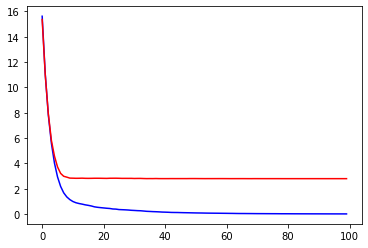

In [75]:
### Plot history
plt.plot(XGBoostModel.evals_result_['validation_0']['mae'],'b')
plt.plot(XGBoostModel.evals_result_['validation_1']['mae'],'r')

In [66]:
XGBoostModel.fit(X_train_scaled,y_train,eval_set= [(X_train_scaled, y_train), (X_test_scaled, y_test)],verbose=True,eval_metric='mae')

[0]	validation_0-mae:15.62086	validation_1-mae:15.36254
[1]	validation_0-mae:11.05669	validation_1-mae:11.00934
[2]	validation_0-mae:7.83575	validation_1-mae:7.92261
[3]	validation_0-mae:5.59376	validation_1-mae:5.81664
[4]	validation_0-mae:4.02341	validation_1-mae:4.57432
[5]	validation_0-mae:2.93190	validation_1-mae:3.72137
[6]	validation_0-mae:2.18457	validation_1-mae:3.21258
[7]	validation_0-mae:1.67927	validation_1-mae:2.98528
[8]	validation_0-mae:1.35669	validation_1-mae:2.91637
[9]	validation_0-mae:1.14251	validation_1-mae:2.83951
[10]	validation_0-mae:0.99177	validation_1-mae:2.83344
[11]	validation_0-mae:0.89326	validation_1-mae:2.82468
[12]	validation_0-mae:0.83235	validation_1-mae:2.82760
[13]	validation_0-mae:0.78509	validation_1-mae:2.83477
[14]	validation_0-mae:0.72913	validation_1-mae:2.82301
[15]	validation_0-mae:0.68817	validation_1-mae:2.81998
[16]	validation_0-mae:0.63879	validation_1-mae:2.82307
[17]	validation_0-mae:0.57153	validation_1-mae:2.82820
[18]	validation_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
names = [0, 'Linear','Ridge','Lasso','RF','GB','XGBoost']

plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.title('R2')
plt.plot(np.mean(trainscores_R2,axis=1),'ro')
plt.plot(testscores_R2,'bo')
locs, labels=plt.xticks()
plt.xticks(locs,names)

plt.subplot(2,3,2)
plt.title('Adj R2')
plt.plot(np.mean(trainscores_R2adj,axis=1),'ro')
plt.plot(testscores_R2adj,'bo')
locs, labels=plt.xticks()
plt.xticks(locs,names)

plt.subplot(2,3,3)
plt.title('MAE')
plt.plot(-np.mean(trainscores_MAE,axis=1),'ro')
plt.plot(testscores_MAE,'bo')
locs, labels=plt.xticks()
plt.xticks(locs,names)

plt.subplot(2,3,4)
plt.title('MSE')
plt.plot(-np.mean(trainscores_MSE,axis=1),'ro')
plt.plot(testscores_MSE,'bo')
locs, labels=plt.xticks()
plt.xticks(locs,names)

plt.subplot(2,3,5)
plt.title('RMSE Early Stopping')
plt.plot(-np.mean(trainscores_MSE,axis=1),'ro')
plt.plot(testscores_MSE,'bo')
locs, labels=plt.xticks()
plt.xticks(locs,names)



# https://stackoverflow.com/questions/56746148/how-to-change-xticks-with-matplotlib/56746205 Ref for x ticks 

{'validation_0': OrderedDict([('rmse',
               [17.036282,
                12.659192,
                9.683251,
                7.583051,
                6.495708,
                5.794709,
                5.352956,
                5.122114,
                5.023192,
                4.887668,
                4.8438,
                4.798436,
                4.773688,
                4.779878,
                4.803486,
                4.7713,
                4.730902,
                4.703005,
                4.714326,
                4.706312,
                4.695761,
                4.688648,
                4.692622,
                4.674279,
                4.660182,
                4.657827,
                4.64346,
                4.644168,
                4.641174,
                4.642736,
                4.638487,
                4.635288,
                4.634288,
                4.630773,
                4.617969,
                4.612625,
                4.614572,
  

In [51]:
X_train.shape #stopping round should be correlated to the size of training dataset 

(404, 13)

* Todo: 
    1. Check other notebooks to see if best score is around what we got. : WIP:
      a. Scoring metrics used: 
          i. MSE : 10 : https://gogul.dev/software/regression-example-boston-housing-prices
          ii. SVR & GradientBoostingRegressor: -11.62 (+/- 5.91) and -12.39 (+/- 5.86) MSE. https://www.kaggle.com/prasadperera/the-boston-housing-dataset
          iii. RF: 0.86 R^2 https://www.kaggle.com/shreayan98c/boston-house-price-prediction 30% test split and specific random_state value
    2. If not, figure hyperparameter tuning
    3. Get a sense of the model. Output vs predict. 
    4. Regression metrics :
        i. R2
        ii. MSE
        iii. negative MSE 
        iv. MAE:
        v: Adjusted R2
    5. Put model eval metrics comparison on a table 
    6. Clean up and make it more readable 

In [164]:
y_Boston.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64